# Encoding

It is no news that Machines only understand numbers, So when trying to make machine to learn, One has to always provide it with numbers to learn from, which makes it impossible for machine to learn from categorical features without some special process, one popular process as such is called **Encoding**. which helps in converting categorical columns to numerical.


As the name implies, Encoding in Machine Learning is when one changes the representation in a data feature following some laid down conditions in order to make our algorithms make predictions with it, Since most machine learning algorithms can not learn from Categorical features which are mostly important features in our dataset to build model with.

Due to these conditions, we have numerous methods of encoding and will try to discuss some of its methods in this class.

**Types of Encoding**
- **Label and Ordinal Encoding** : In label encoding,It is used to encode Ordered categorical features the classes in the features will be given discrete numbers increasing by Order, for instance, a feature with three classes of data will be encoded to have, 0,1,2 discrete values. It is not suitable to use for Nominal data because it adds weight to classes.

- **One hot encoding and Dommying Encoding** : This two encodings works similarly with just a slight difference, It is best used on Nominal Categorical features. It represents the classes as 1s and 0s and create additional features, of N (number of classes) for One hot encoding and N-1 for Dummying. and represents with 0 if the class in the particular Instance does not fall under the class feature and 1 if it does.

- **Frequency Encoding** : This is encoded with regards to how many times a class appears in the feature, then the frequency value of each class is used to replace the class in the column.

- **Target Encoding** : This method of encoding takes to account the Target / Label variable, It maps every class instance with its corresponding target variable then gets total sum for each class and use that to find the mean of the class by diving the total sum for each class by corresponding frequency for the class and uses the  mean value to represent the class

We will be practicing these methods using two techniques. 
**Use of  Category_encoders python package**. Which you can install on your notebooks using internet with 
**!pip install category_encoders**.

**We Use Scikit libraries** .

### Lets Practice!!!

In [1]:
### Lets import our needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import category_encoders as ce ## If you already have it installed.
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
## Lets generate categorical data.
random.seed(24)
max_rows = 30
languages_list = ['python','java','C++']
languages = []
level_list = ['Entry Level','Experienced Level','Senior Level']
levels = []
Salary = []

for _ in range (0, max_rows) :
    language = random.choice(languages_list)
    level = random.choice(level_list)
    languages.append(language)
    levels.append(level) 
for _ in levels :
    if _ == "Entry Level" :
        Salary.append(random.randrange(150000, 500000))
    elif _ == "Experienced Level" :
        Salary.append(random.randrange(750000, 1200000))
    elif _ == "Senior Level" :
        Salary.append(random.randrange(1500000, 4000000))
    else:
        Salary.append(np.nan)
framed = pd.DataFrame({"Languages":languages,"Levels":levels,"Salaries":Salary})
framed

,Languages,Levels,Salaries
0,C++,Experienced Level,1139433
1,C++,Entry Level,293587
2,python,Entry Level,253848
3,python,Entry Level,199070
4,C++,Senior Level,3917472
5,python,Senior Level,3573776
6,python,Senior Level,2147087
7,java,Senior Level,2100206
8,python,Experienced Level,920004
9,java,Senior Level,3511385


Our dataframe is a 30 by 3 matrix, with two categorical features of **Languages** and **Levels**, and labels of the amount earned as **Salaries**. This Shows a sample poppulation of tech employees in organisations.

The first feature is a **Nominal Categorical Feature** while the second feature is an **Ordinal Categorical Feature** then the label is a **Discret Numerical Feature** 

In [3]:
framed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Languages  30 non-null     object
 1   Levels     30 non-null     object
 2   Salaries   30 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 848.0+ bytes


In [4]:
## First approach using label encoding or Ordinal Encoding
def lets_encode(df, cols, package, encoder = None) :
    """
Function For Encoding Categorical Features, various methods for encoding are included in this function, to choose a
method,
Parameters :
df = Dataframe
cols = column or columns needed
package = method of packages to use which can be : le, ce_oe,oh,du,fe,mt
we provide the following short form of methods with its meaning as follows :
le = Label Encoding
ce_oe = categorical encoders Ordinal Encoding
oh = One hot encoding
du = dummy encoding
fe = frequency encoding
mt = mean target encoding

encoder = external method needed for encoding
    """
    encoded_df = df[cols]
    if package == "le" :
        encoded_df = encoded_df.apply(encoder.fit_transform)
        return encoded_df
    elif package == "ce_oe" :
        encoded_df = encoder.fit_transform(encoded_df)
        return encoded_df
    elif package == "oh" :
        encoded_df = pd.DataFrame(encoder.fit_transform(encoded_df).toarray())
        return encoded_df
    elif package == "du" :
        encoded_df = pd.get_dummies(df[cols])
        return encoded_df
    elif package == 'fe' :
        encoded_df = df[cols]
        y = encoded_df.groupby(cols).size().reset_index()
        y.columns = [cols[0], 'freq'+cols[0]]
        encoded_df = pd.merge(encoded_df,y,on = cols[0], how = 'left')
        return encoded_df
    elif package == "mt" :
        encoded_df = df[cols]
        x = encoded_df.groupby([cols[0]])[cols[1]].sum().reset_index()
        x = x.rename(columns={cols[1]:cols[0]+"_"+cols[1]+"_sum"})

        y = encoded_df.groupby([cols[0]])[cols[1]].count().reset_index()
        y = y.rename(columns={cols[1] :cols[0]+"_"+cols[1]+"_Count"})

        z = pd.merge(x,y,on = cols[0], how = 'inner')

        z['Target_enc_levels'] = z[cols[0]+"_"+cols[1]+"_sum"]/z[cols[0]+"_"+cols[1]+"_Count"]
        encoded_df = pd.merge(encoded_df,z,on = cols[0], how = 'left')

        return encoded_df

A function was created which can be used for all methods of Encoding we will be treating in this class.

In [5]:
lets_encode?

In [6]:
framed.head()

,Languages,Levels,Salaries
0,C++,Experienced Level,1139433
1,C++,Entry Level,293587
2,python,Entry Level,253848
3,python,Entry Level,199070
4,C++,Senior Level,3917472


In [7]:
sk_label = lets_encode(framed,['Languages','Levels'], "le",LabelEncoder())
sk_label.head(9)

,Languages,Levels
0,0,1
1,0,0
2,2,0
3,2,0
4,0,2
5,2,2
6,2,2
7,1,2
8,2,1


This was used for encoding both categorical features and we can see it represents them with numbers. for instance in **Languages**, It represents **C++ with 0, python with 2 and Java with 1**, which might give the data an unwanted weight since it is nominal, One reason it is good for ordinal data, but one must be careful, and make sure it is encoded in the correct order. Which take us to the next method

In [8]:
## Ordina encode with category_encoders
encoder = ce.OrdinalEncoder(cols=['Languages','Levels'],
                           mapping=[{'col':"Levels",
                                    'mapping':{"Entry Level":1,
                                              "Experienced Level":2,
                                              "Senior Level":3}}])
ce_ordinal = lets_encode(framed,['Languages','Levels'], "ce_oe",encoder)
print(ce_ordinal.head())
print(framed.head())

  Languages  Levels
0       C++       2
1       C++       1
2    python       1
3    python       1
4       C++       3
  Languages             Levels  Salaries
0       C++  Experienced Level   1139433
1       C++        Entry Level    293587
2    python        Entry Level    253848
3    python        Entry Level    199070
4       C++       Senior Level   3917472


This solves the Order part perfectly Since the Order can explicitly be provided but the weight is still there plus equal scale.

In [9]:
## One Hot Encoding 
one_hot = lets_encode(framed,['Languages'],"oh",OneHotEncoder())
print(framed.head(9))
print(one_hot.head(9))

  Languages             Levels  Salaries
0       C++  Experienced Level   1139433
1       C++        Entry Level    293587
2    python        Entry Level    253848
3    python        Entry Level    199070
4       C++       Senior Level   3917472
5    python       Senior Level   3573776
6    python       Senior Level   2147087
7      java       Senior Level   2100206
8    python  Experienced Level    920004
     0    1    2
0  1.0  0.0  0.0
1  1.0  0.0  0.0
2  0.0  0.0  1.0
3  0.0  0.0  1.0
4  1.0  0.0  0.0
5  0.0  0.0  1.0
6  0.0  0.0  1.0
7  0.0  1.0  0.0
8  0.0  0.0  1.0


We can see how this creates different columns for each class and assigns 1, if the class in that instance is the sub_column, then 0 if it isn't, This is good for Nominal data that have more that two classes, but doesn't work well when the classes are too much because it creates huge matrix that will consume much of the system's memory, It doesn't work well with tree based algorithms too.

In [10]:
dummied = lets_encode(framed,['Languages'],"du")
print(framed.head(9))
dummied.head(9)

  Languages             Levels  Salaries
0       C++  Experienced Level   1139433
1       C++        Entry Level    293587
2    python        Entry Level    253848
3    python        Entry Level    199070
4       C++       Senior Level   3917472
5    python       Senior Level   3573776
6    python       Senior Level   2147087
7      java       Senior Level   2100206
8    python  Experienced Level    920004


,Languages_C++,Languages_java,Languages_python
0,1,0,0
1,1,0,0
2,0,0,1
3,0,0,1
4,1,0,0
5,0,0,1
6,0,0,1
7,0,1,0
8,0,0,1


Better Version of One hot encoding with styles and all, one does not really need to rename the columns using this method for the encoding.

In [12]:
framed['Languages'].value_counts()

C++       12
python     9
java       9
Name: Languages, dtype: int64

In [13]:
freq = lets_encode(framed,['Languages'],'fe')
freq.head(9)

,Languages,freqLanguages
0,C++,12
1,C++,12
2,python,9
3,python,9
4,C++,12
5,python,9
6,python,9
7,java,9
8,python,9


This Method counts the number of times the each classes appears in a feature, then is used to replace the class in another series for each instance

In [14]:
target = lets_encode(framed,['Languages','Salaries'],"mt")
target.head(20)

,Languages,Salaries,Languages_Salaries_sum,Languages_Salaries_Count,Target_enc_levels
0,C++,1139433,12650927,12,1.054244e+06
1,C++,293587,12650927,12,1.054244e+06
2,python,253848,12897352,9,1.433039e+06
3,python,199070,12897352,9,1.433039e+06
4,C++,3917472,12650927,12,1.054244e+06
5,python,3573776,12897352,9,1.433039e+06
6,python,2147087,12897352,9,1.433039e+06
7,java,2100206,13368868,9,1.485430e+06
8,python,920004,12897352,9,1.433039e+06
9,java,3511385,13368868,9,1.485430e+06


This method groups the classes in the feature with their corresponding values in the target/label, gets the mean for each classes and Use the mean values to replace the classes in the feature, It is One of the best powerful method to use, the only downside of this method is Overfitting which can be fixed by Regularizing the Model.

### Lets practice with external data !!

In [15]:
## read in the data 

df = pd.read_csv('Loan prediction train.csv')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We will be working with **Education** as Ordinal and **Property_Area** as nominal features

In [17]:
sk_label = lets_encode(df,['Education'], "le",LabelEncoder())
sk_label.head()

,Education
0,0
1,0
2,0
3,1
4,0


In [18]:
encoder = ce.OrdinalEncoder(cols=['Education'],
                           mapping=[{'col':"Education",
                                    'mapping':{"Graduate":2,
                                              "Not Graduate":1}}])
ce_ordinal = lets_encode(df,['Education'], "ce_oe",encoder)
ce_ordinal.head()

,Education
0,2
1,2
2,2
3,1
4,2


In [19]:
one_hot = lets_encode(df,['Property_Area'],"oh",OneHotEncoder())
one_hot.head()

,0,1,2
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [20]:
dummied = lets_encode(df,['Property_Area'],"du")
dummied.head()

,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [21]:
freq = lets_encode(df,['Education'],'fe')
freq.head()

,Education,freqEducation
0,Graduate,480
1,Graduate,480
2,Graduate,480
3,Not Graduate,134
4,Graduate,480


In [22]:
freq = lets_encode(df,['Property_Area'],'fe')
freq.head(10)

,Property_Area,freqProperty_Area
0,Urban,202
1,Rural,179
2,Urban,202
3,Urban,202
4,Urban,202
5,Urban,202
6,Urban,202
7,Semiurban,233
8,Urban,202
9,Semiurban,233


In [23]:
## Convert the Target to Numerical column.
Loan = []
for i in df['Loan_Status'] :
    if i == "Y":
        Loan.append(1)
    else :
        Loan.append(0)
df['Loan_Status'] = Loan

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [24]:
target = lets_encode(df,['Education','Loan_Status'],"mt")
target.head(10)

,Education,Loan_Status,Education_Loan_Status_sum,Education_Loan_Status_Count,Target_enc_levels
0,Graduate,1,340,480,0.708333
1,Graduate,0,340,480,0.708333
2,Graduate,1,340,480,0.708333
3,Not Graduate,1,82,134,0.611940
4,Graduate,1,340,480,0.708333
5,Graduate,1,340,480,0.708333
6,Not Graduate,1,82,134,0.611940
7,Graduate,0,340,480,0.708333
8,Graduate,1,340,480,0.708333
9,Graduate,0,340,480,0.708333


In [25]:
target = lets_encode(df,['Property_Area','Loan_Status'],"mt")
target

,Property_Area,Loan_Status,Property_Area_Loan_Status_sum,Property_Area_Loan_Status_Count,Target_enc_levels
0,Urban,1,133,202,0.658416
1,Rural,0,110,179,0.614525
2,Urban,1,133,202,0.658416
3,Urban,1,133,202,0.658416
4,Urban,1,133,202,0.658416
...,...,...,...,...,...
609,Rural,1,110,179,0.614525
610,Rural,1,110,179,0.614525
611,Urban,1,133,202,0.658416
612,Urban,1,133,202,0.658416


# Normalization

It won't be that ideal to discuss Normalization in ML without discussing feature Scaling.

## Feature Scaling 

Lets assume we have a dataset that has age and net worth as features, we all know that values for net worth averagely will be above hundreds of thousands while that of age averagely will be around 100. This will make some ML algorithm give higher priority to net worth as a feature which most times is not usually the case, So in order to prevent this, we have to use a technique tagged Feature Scaling.

Feature Scaling will help us scale the features to similar range of values which will help some algorithms (Distance based, those that utilizes gradient descent, neural networks ) make better predictions. It is a preprocessing technique carried out on Numerical features.

### Techniques For Scaling

- Normalization : This is a technique whereby the range of the data is changed but the shape is not changed, It is usually used on data features that does not follow a Gaussian distribution.
- Standardization : This changes the shape of the data feature to a Gaussian distribution, where the mean will be Zero and Standard deviation will be 1.

### Methods for scaling features (Standardization and Normalization)

* **MinMax Scaler** : It is a method used for Normalization,The difference between a value and the minimum value divided by the difference between the Maximum and Minimum Value. And the data ranges from 0 till 1.Its equation goes thus : $X_{new}=\frac{X-X_{min}}{X_{max}-X_{min}}$  It works well on data features whose distribution is not Gaussian and have low variance, It is very sensitive to Outliers. 

* **Standard Scaler** : It assumes data features are Gaussian distribution, So I will say it follows Standardization techniques and not good for features that are not normal distributed, and it gives the new values mean of 0 and standard deviation of 1. Its equation goes thus : $x_{new} = \frac{x-\mu}{\sigma}$

* **Robust Scaler** : This is best used for scaling features with outliers since it is not affected by it. It gets the difference of the feature item and the median value of the feature and divides it by the IQR (Inter Quartile Range) which is the difference between the 75th percentile and 25th percentile of the distribution, Its formula goes thus : $x_{new}=\frac{x\,-\,x_{median}}{IQR}$.

* **Power Transformer Scaler** : This method is used to make data more Gaussian distributed, It is handles data feature that is formed from features with highly varying variance which leads to highly skewed data. It uses Maximum likelihood estimation for scaling. Its Method in Sklearn package supports Box-Cox transform for strictly positive data feature and Yeo-Johnson transform for both positive and negative data features. 

### Lets practice !!!

In [26]:
### Lets import required packages
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer

In [27]:
### Lets generate data 
max_row = 30
low_int = [random.randrange(1,9) for i in range(max_row)]
high_int = [random.randrange(100,900) for i in range(max_row)]
data = pd.DataFrame({"low_int":low_int, "high_int":high_int})
data['no_out'] = data['high_int']
data['high_int'][25:29] = [1400,1600, 1200,1500]
data['with_neg'] = data['no_out']
data['with_neg'][7:11] = [-2, -10, -5, -6]

In [28]:
data['high_int'][25:29] = [4000,3200, 1200,1500]

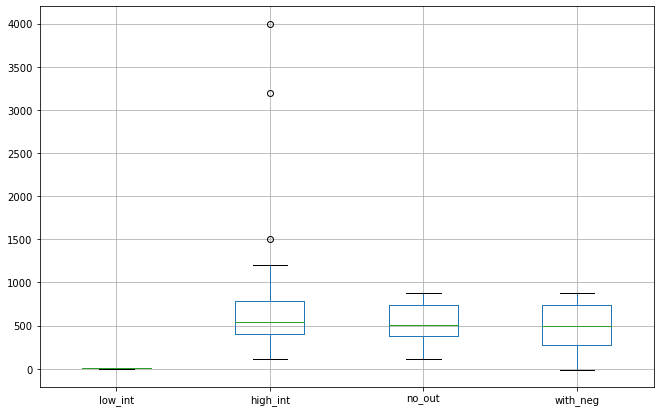

In [29]:
data.boxplot(figsize = (11, 7))
plt.show()

This Shows the data with different Scale, with low in been almost invisible, and some with outliers

In [30]:
### scaling function
def Scaler(df, cols, method):
    scaled_df = df[cols]
    if method.lower() == "mmx":
        scaler = MinMaxScaler()
        scaled_df = pd.DataFrame(scaler.fit_transform(scaled_df))
        scaled_df.columns = cols
        return scaled_df
    elif method.lower() == "sts":
        scaler = StandardScaler()
        scaled_df = pd.DataFrame(scaler.fit_transform(scaled_df))
        scaled_df.columns = cols
        return scaled_df
    elif method.lower() == "rbs":
        scaler = RobustScaler()
        scaled_df = pd.DataFrame(scaler.fit_transform(scaled_df))
        scaled_df.columns = cols
        return scaled_df
    elif method.lower() == "ptb":
        scaler = PowerTransformer(method='box-cox')
        scaled_df = pd.DataFrame(scaler.fit_transform(scaled_df))
        scaled_df.columns = cols
        return scaled_df
    elif method.lower() == "pty":
        scaler = PowerTransformer(method='yeo-johnson')
        scaled_df = pd.DataFrame(scaler.fit_transform(scaled_df))
        scaled_df.columns = cols
        return scaled_df

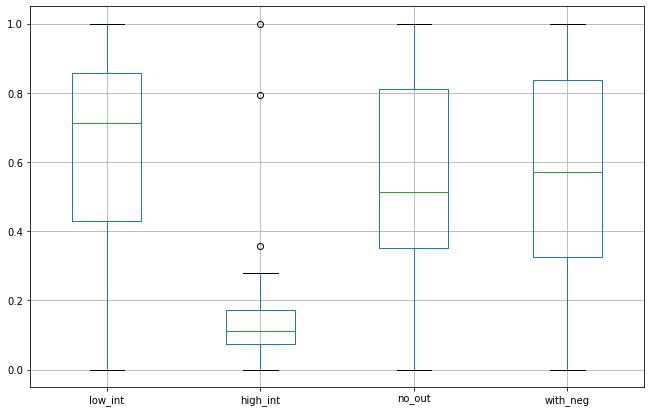

In [31]:
min_max = Scaler(data, ['low_int','high_int','no_out','with_neg'],'mmx')
min_max.boxplot(figsize = (11, 7))
plt.show()

Using Min_Max scaler, one can see that the data is between the range 0 and 1,and the effect of outlier is shown from its varying quartile indication

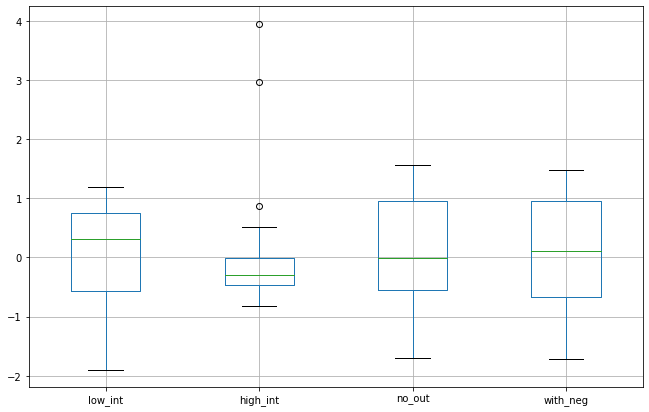

In [32]:
%matplotlib inline
Sta = Scaler(data, ['low_int','high_int','no_out','with_neg'],'sts')
Sta.boxplot(figsize = (11, 7))
plt.show()

<AxesSubplot:ylabel='low_int'>

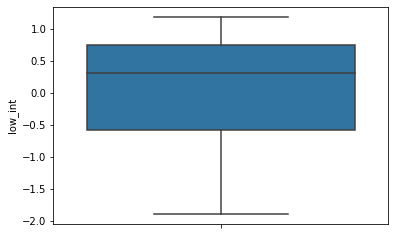

In [33]:
sns.boxplot(data=Sta, y='low_int')

Standard Scaler worked best with the column with no outlier which follows Gaussian distribution, but performed bad with data

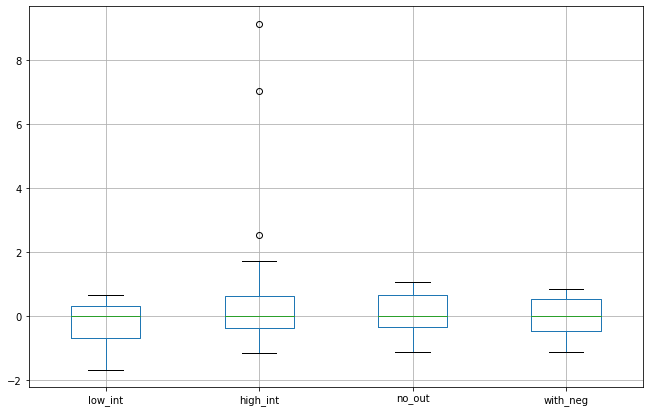

In [34]:
robust = Scaler(data, ['low_int','high_int','no_out','with_neg'],'rbs')
robust.boxplot(figsize = (11, 7))
plt.show()

Robust Scaler, Shows its is not affected by Outliers, you can see its 50th percentile been equal and 0.

In [35]:
box_cox = Scaler(data, ['low_int','high_int','no_out','with_neg'],'ptb')
box_cox.boxplot(figsize = (11, 7))
plt.show()

ValueError: The Box-Cox transformation can only be applied to strictly positive data

This Shows that Box-cox does not accept negative values

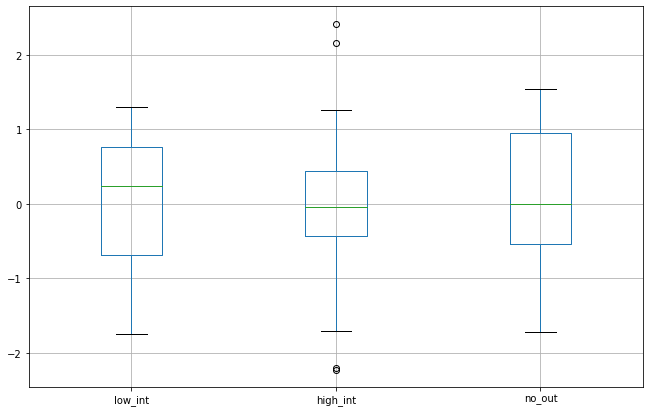

In [36]:
box_cox = Scaler(data, ['low_int','high_int','no_out'],'ptb')
box_cox.boxplot(figsize = (11, 7))
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


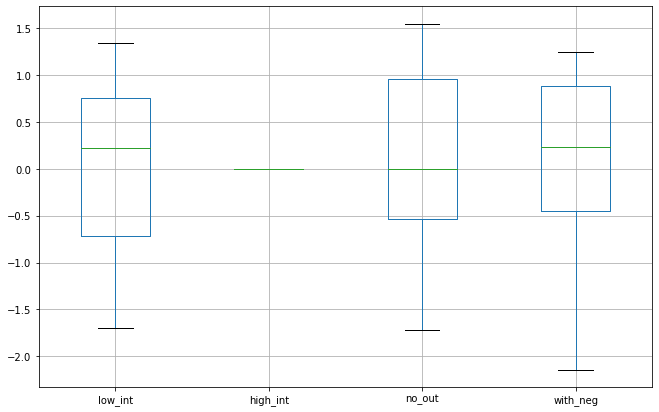

In [37]:
yeo = Scaler(data, ['low_int','high_int','no_out','with_neg'],'pty')
yeo.boxplot(figsize = (11, 7))
plt.show()

### Lets work on real data

In [38]:
### Using dataset read in earlier
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace = True)
df['Credit_History'].fillna(df['Credit_History'].median(), inplace = True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [40]:


df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,592.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049,0.687296
std,6109.041673,2926.248369,85.587325,64.428629,0.352339,0.463973
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


We will be picking **CoapplicantIncome** and **LoanAmount** to work with

In [41]:
s_df = df[["CoapplicantIncome","LoanAmount"]]

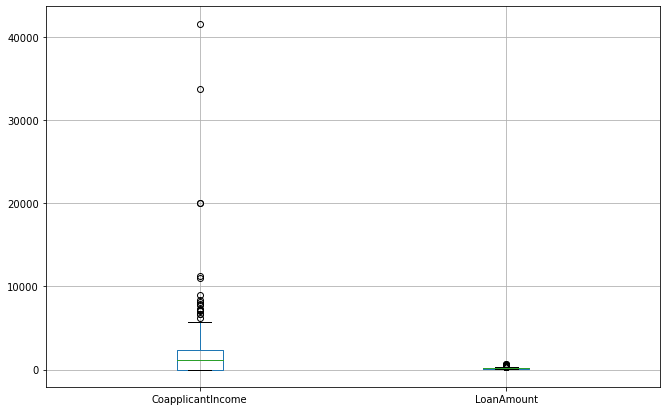

In [42]:
s_df.boxplot(figsize = (11, 7))
plt.show()

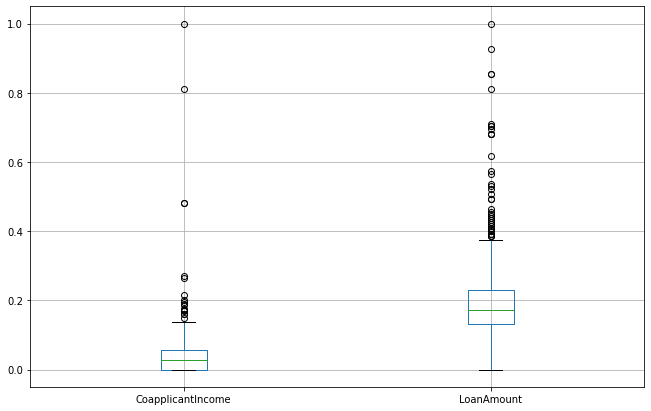

In [43]:
min_max_df = Scaler(df, ["CoapplicantIncome","LoanAmount"],'mmx')
min_max_df.boxplot(figsize = (11, 7))
plt.show()

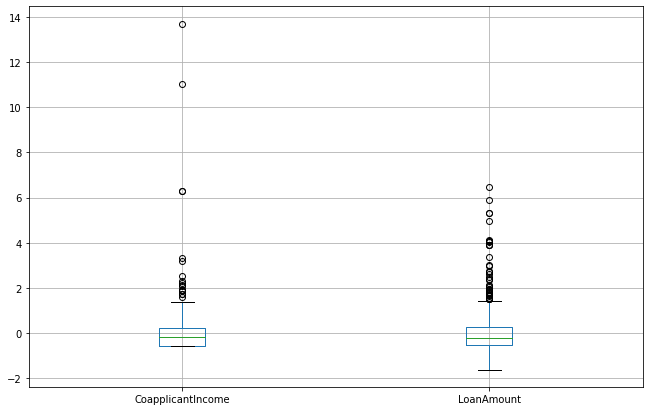

In [44]:
sta_df = Scaler(df, ["CoapplicantIncome","LoanAmount"],'sts')
sta_df.boxplot(figsize = (11, 7))
plt.show()

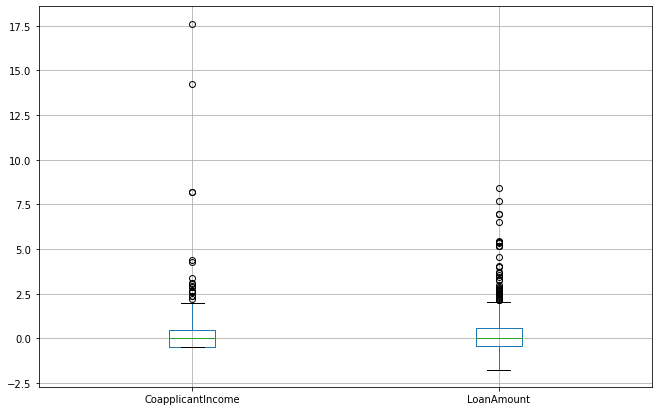

In [45]:
Rob_df = Scaler(df, ["CoapplicantIncome","LoanAmount"],'rbs')
Rob_df.boxplot(figsize = (11, 7))
plt.show()

In [46]:
ptb_df = Scaler(df, ["CoapplicantIncome","LoanAmount"],'ptb')
ptb_df.boxplot(figsize = (11, 7))
plt.show()

ValueError: The Box-Cox transformation can only be applied to strictly positive data

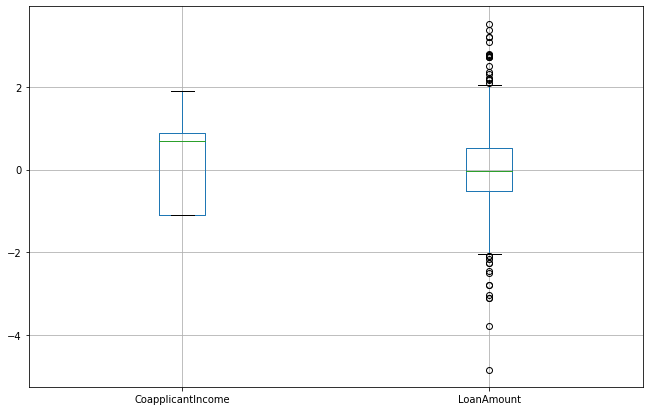

In [47]:
pty_df = Scaler(df, ["CoapplicantIncome","LoanAmount"],'pty')
pty_df.boxplot(figsize = (11, 7))
plt.show()